In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import numpy as np


In [246]:
df = pd.read_excel(r'/Users/Ash/Desktop/dataAnalisisProject/1688639662_ausapparalsales4thqrt2020.xlsx')


In [247]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [207]:
print(df['State'] )

0         WA
1         WA
2         WA
3         WA
4         WA
        ... 
7555     TAS
7556     TAS
7557     TAS
7558     TAS
7559     TAS
Name: State, Length: 7560, dtype: object


In [208]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [209]:
missing_values = df.isna().sum()



# Inspect the data for non-missing values
non_missing_values = df.notna().sum()

# Analyze the results
print("Missing values:")
print(missing_values)

print("\nNon-missing values:")
print(non_missing_values)

Missing values:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Non-missing values:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [210]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [211]:
# df['Unit'] = df['Unit'].strip()
# df['Unit'].unique()

# df['Sales'] = df['Sales'].strip()
# df['Sales'].unique()



df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df




/var/folders/y8/sxqdbfbx5hn4324ynvcvg8wr0000gp/T/ipykernel_59722/489627046.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


['Group']


In [213]:


from sklearn.preprocessing import MinMaxScaler


# Normalize the numeric columns

# scaler = MinMaxScaler()

# df2[['Unit', 'Sales']] = scaler.fit_transform(df[['Unit', 'Sales']])

# Normalize ['Sales'] column

df2 = df.copy()

min_sales = df['Sales'].min()
max_sales = df['Sales'].max()

df2['Normalized_Sales'] = (df['Sales'] - min_sales) / (max_sales - min_sales)
df2.head()




,Date,Time,State,Group,Unit,Sales,Normalized_Sales
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873


In [214]:
df2.corr(numeric_only=True)



,Unit,Sales,Normalized_Sales
Unit,1.0,1.0,1.0
Sales,1.0,1.0,1.0
Normalized_Sales,1.0,1.0,1.0


In [215]:
min_unit = df['Unit'].min()
max_unit = df['Unit'].max()
df2['Normalized_Units'] = (df['Unit'] - min_unit) / (max_unit - min_unit)
df2.head()


,Date,Time,State,Group,Unit,Sales,Normalized_Sales,Normalized_Units
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


In [216]:
# df.Date.unique()
df[['Time', 'Sales']].groupby('Time').mean()

,Sales
Time,
Afternoon,45241.071429
Evening,44479.166667
Morning,45320.436508


In [217]:
df.Time.unique()

array(['Morning', 'Afternoon', 'Evening'], dtype=object)

In [218]:
group_sales = df.groupby('Group')['Sales'].sum()
group_sales

Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64

In [219]:
state_sales = df.groupby('State')['Sales'].sum()
state_sales

State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64

In [220]:
state_group_sales = df.groupby(['State','Group'])['Sales'].sum()
state_group_sales

State  Group  
NSW    Kids       18587500
       Men        19022500
       Seniors    18187500
       Women      19172500
NT     Kids        5700000
       Men         5762500
       Seniors     5465000
       Women       5652500
QLD    Kids        8510000
       Men         8392500
       Seniors     8190000
       Women       8325000
SA     Kids       14515000
       Men        14655000
       Seniors    14717500
       Women      14970000
TAS    Kids        5775000
       Men         5757500
       Seniors     5650000
       Women       5577500
VIC    Kids       26360000
       Men        26407500
       Seniors    26315000
       Women      26482500
WA     Kids        5625000
       Men         5752500
       Seniors     5512500
       Women       5262500
Name: Sales, dtype: int64

In [221]:
sales_mean = df['Sales'].mean()
unit_mean = df['Unit'].mean()

sales_median = df['Sales'].median()
unit_median = df['Unit'].median()

sales_mode = df['Sales'].mode()
unit_mode = df['Unit'].mode()


sales_std = df['Sales'].std()
unit_std = df['Unit'].std()


In [222]:


group_sales = df.groupby('Group')['Sales'].sum()
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

state_sales = df.groupby('State')['Sales'].sum()
highest_sales_state = state_sales.idxmax()
lowest_sales_state = state_sales.idxmin()

print(f"Highest Sales Group: {highest_sales_group}")
print(f"Lowest Sales Group: {lowest_sales_group}")
print(f"Highest Sales State: {highest_sales_state}")
print(f"Lowest Sales State: {lowest_sales_state}")


Highest Sales Group: Men
Lowest Sales Group: Seniors
Highest Sales State: VIC
Lowest Sales State: WA


In [223]:
df['Date'] = pd.to_datetime(df['Date'])

# Weekly report
weekly_sales = df.resample('W-Mon', on='Date').agg({'Time': ', '.join, 'State': ', '.join, 'Sales': 'sum'})

# Monthly report
monthly_sales = df.resample('M', on='Date').agg({'Time': ', '.join, 'State': ', '.join, 'Sales': 'sum'})

# Quarterly report
quarterly_sales = df.resample('Q', on='Date').agg({'Time': ', '.join, 'State': ', '.join, 'Sales': 'sum'})
# Print reports
print("Weekly Report:\n", weekly_sales)
print("\nMonthly Report:\n", monthly_sales)
print("\nQuarterly Report:\n", quarterly_sales)


Weekly Report:
                                                          Time  \
Date                                                            
2020-10-05  Morning, Morning, Morning, Morning, Afternoon,...   
2020-10-12  Morning, Morning, Morning, Morning, Afternoon,...   
2020-10-19  Morning, Morning, Morning, Morning, Afternoon,...   
2020-10-26  Morning, Morning, Morning, Morning, Afternoon,...   
2020-11-02  Morning, Morning, Morning, Morning, Afternoon,...   
2020-11-09  Morning, Morning, Morning, Morning, Afternoon,...   
2020-11-16  Morning, Morning, Morning, Morning, Afternoon,...   
2020-11-23  Morning, Morning, Morning, Morning, Afternoon,...   
2020-11-30  Morning, Morning, Morning, Morning, Afternoon,...   
2020-12-07  Morning, Morning, Morning, Morning, Afternoon,...   
2020-12-14  Morning, Morning, Morning, Morning, Afternoon,...   
2020-12-21  Morning, Morning, Morning, Morning, Afternoon,...   
2020-12-28  Morning, Morning, Morning, Morning, Afternoon,...   
2021-01-0

/var/folders/y8/sxqdbfbx5hn4324ynvcvg8wr0000gp/T/ipykernel_59722/1326656580.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date').agg({'Time': ', '.join, 'State': ', '.join, 'Sales': 'sum'})
/var/folders/y8/sxqdbfbx5hn4324ynvcvg8wr0000gp/T/ipykernel_59722/1326656580.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample('Q', on='Date').agg({'Time': ', '.join, 'State': ', '.join, 'Sales': 'sum'})


In [224]:
# Concatenate all reports into a single dfFrame
all_reports = pd.concat([weekly_sales, monthly_sales, quarterly_sales], axis=0)

# Save all reports to a single Excel file
all_reports.to_excel('all_reports.xlsx')


In [225]:
df['Time'].unique()

array(['Morning', 'Afternoon', 'Evening'], dtype=object)

In [226]:
df['State'].unique()

array(['WA', 'NT', 'SA', 'VIC', 'QLD', 'NSW', 'TAS'], dtype=object)

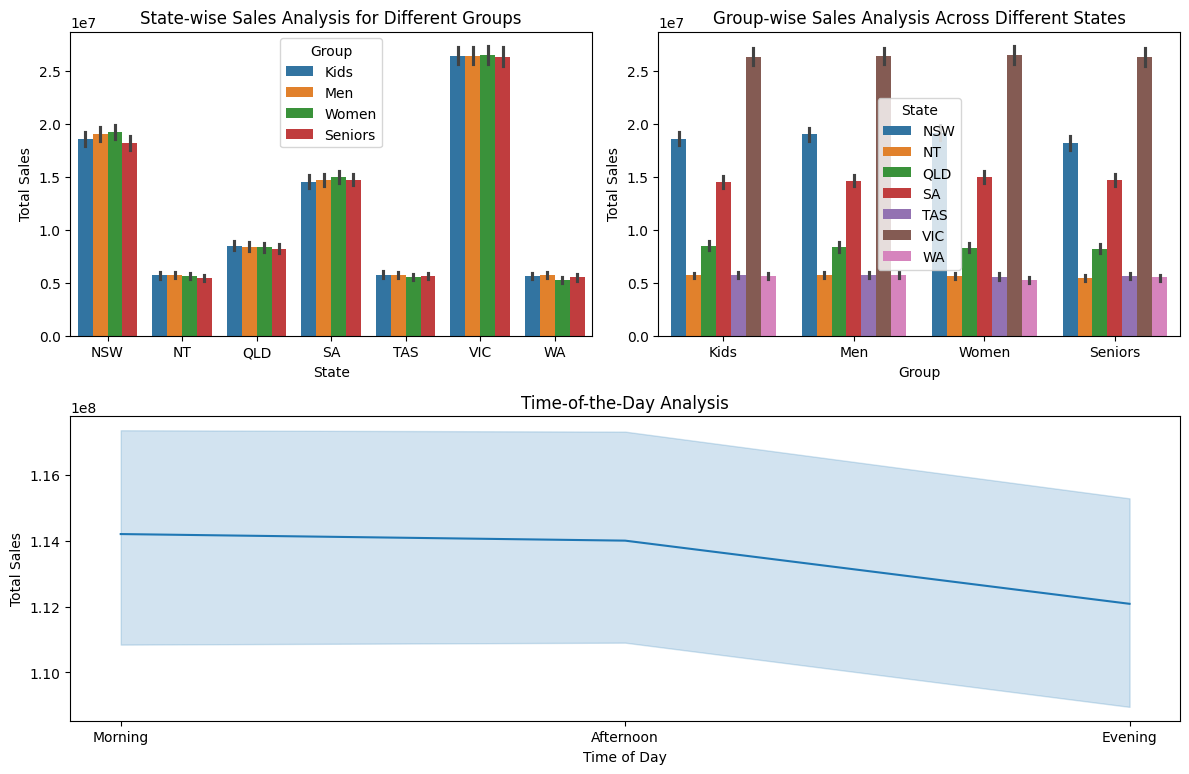

In [227]:
# Convert 'State' column to categorical df type

df['State'] = df['State'].astype('category')

# Set figure size for plots
plt.figure(figsize=(12, 8))

# State-wise sales analysis for different groups
plt.subplot(2, 2, 1)
sns.barplot(data=df, x='State', y='Sales', hue='Group', estimator=sum)
plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Group-wise sales analysis across different states
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Group', y='Sales', hue='State', estimator=sum)
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Total Sales')

# Time-of-the-day analysis
plt.subplot(2, 1, 2)
sns.lineplot(data=df, x='Time', y='Sales', estimator=sum)
plt.title('Time-of-the-Day Analysis')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [228]:
df["Sales"]

0       20000
1       20000
2       10000
3       37500
4        7500
        ...  
7555    35000
7556    37500
7557    37500
7558    27500
7559    32500
Name: Sales, Length: 7560, dtype: int64

In [229]:
df[df['Time'] == 'Morning']['Sales'].sum()

114207500

In [230]:
df[df['Time'] == 'Evening']['Sales'].sum()

112087500

In [231]:
df[df['Time'] == 'Afternoon']['Sales'].sum()

114007500

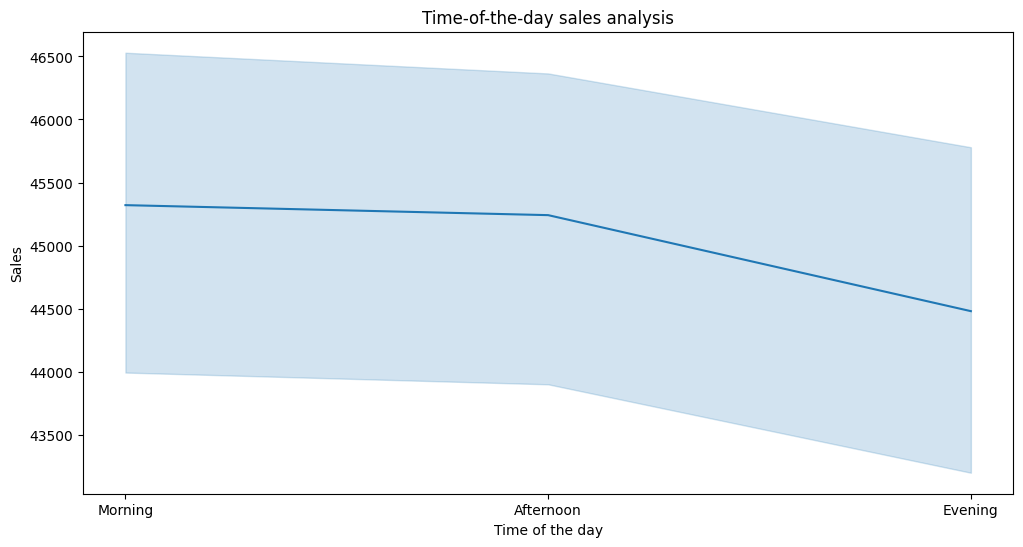

Highest Sales Time: Evening
Lowest Sales Time: Morning


In [232]:
# Time-of-the-day analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Time', y='Sales')
plt.title('Time-of-the-day sales analysis')
plt.xlabel('Time of the day')
plt.ylabel('Sales')
plt.show()

# Determine highest and lowest sales times
highest_sales_time = df.loc[df['Sales'].idxmax()]['Time']

lowest_sales_time = df.loc[df['Sales'].idxmin()]['Time']

print("Highest Sales Time:", highest_sales_time)
print("Lowest Sales Time:", lowest_sales_time)


/var/folders/y8/sxqdbfbx5hn4324ynvcvg8wr0000gp/T/ipykernel_59722/1591574441.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()
/var/folders/y8/sxqdbfbx5hn4324ynvcvg8wr0000gp/T/ipykernel_59722/1591574441.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample('Q').sum()


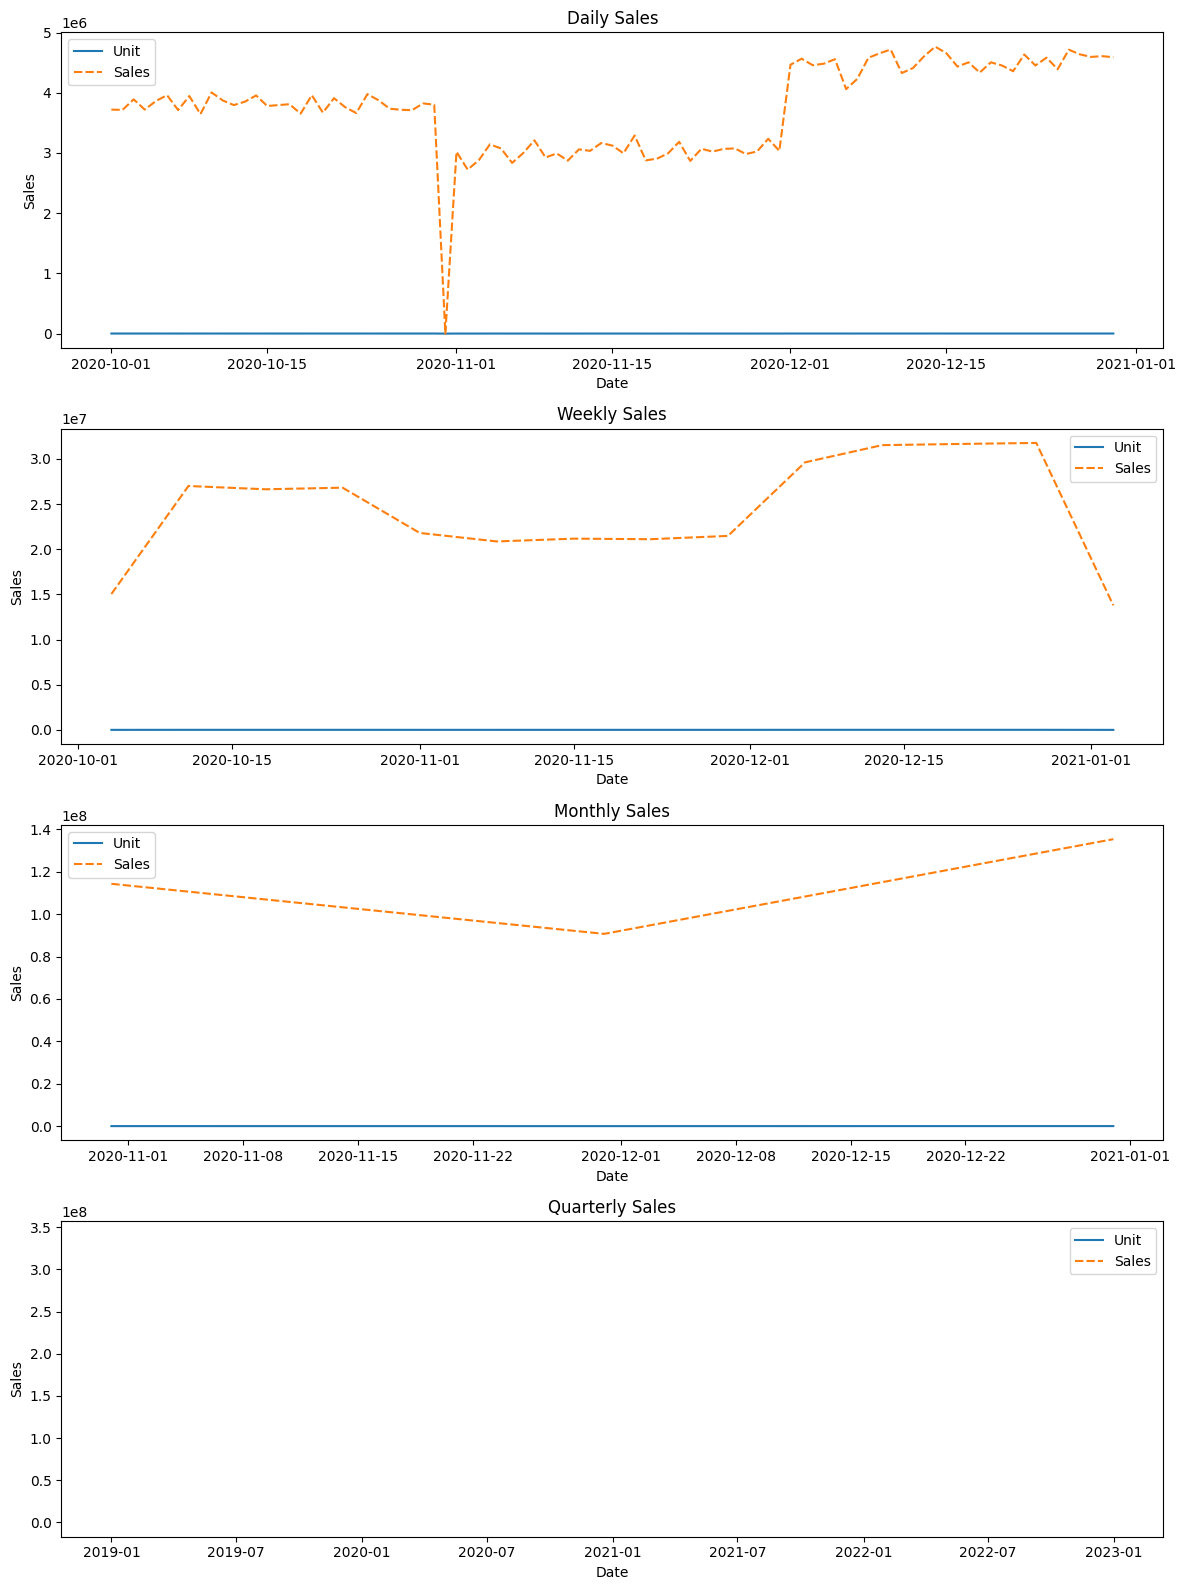

In [248]:

# Assuming df is your DataFrame containing the sales data

# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample data
daily_sales = df.resample('D').sum()
weekly_sales = df.resample('W').sum()
monthly_sales = df.resample('M').sum()
quarterly_sales = df.resample('Q').sum()

# Create dashboard
fig, axs = plt.subplots(4, 1, figsize=(12, 16))

# Daily sales plot
sns.lineplot(data=daily_sales, ax=axs[0])
axs[0].set_title('Daily Sales')
axs[0].set_ylabel('Sales')

# Weekly sales plot
sns.lineplot(data=weekly_sales, ax=axs[1])
axs[1].set_title('Weekly Sales')
axs[1].set_ylabel('Sales')

# Monthly sales plot
sns.lineplot(data=monthly_sales, ax=axs[2])
axs[2].set_title('Monthly Sales')
axs[2].set_ylabel('Sales')

# Quarterly sales plot
sns.lineplot(data=quarterly_sales, ax=axs[3])
axs[3].set_title('Quarterly Sales')
axs[3].set_ylabel('Sales')

# Adjust layout
fig.tight_layout()

# Show dashboard
plt.show()


In [ ]:
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500
